In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

In [29]:
file_path = r"C:\Users\sk062\Documents\Full text of the speech.txt"

In [32]:
with open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

In [38]:
# セクションごとに分割
sections = re.split(r'\n\((.*?)\)\n', text)
section_names = sections[1::2]  # セクション名
section_texts = sections[2::2]  # 各セクションのテキスト

In [40]:
# 各セクションの単語数を計算
section_word_counts = [len(re.findall(r'\w+', section)) for section in section_texts]
section_word_counts

[139,
 1032,
 248,
 325,
 493,
 151,
 82,
 64,
 168,
 27,
 508,
 752,
 109,
 75,
 42,
 96,
 241]

In [42]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 5.8 MB/s eta 0:00:00


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import pandas as pd

In [44]:
# LDAトピック分析
def lda_topic_analysis(texts, n_topics=3):
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    doc_term_matrix = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(doc_term_matrix)
    topics = lda.components_
    feature_names = vectorizer.get_feature_names_out()
    topic_words = {f"Topic {i}": [feature_names[index] for index in topics[i].argsort()[-10:][::-1]] for i in range(n_topics)}
    return topic_words

In [45]:
# 感情分析
def sentiment_analysis(texts):
    sentiments = []
    for text in texts:
        blob = TextBlob(text)
        sentiments.append(blob.sentiment.polarity)  # ポジティブ or ネガティブ
    return sentiments

In [46]:
# セクションごとのトピックと感情分析
topics = lda_topic_analysis(section_texts)
sentiments = sentiment_analysis(section_texts)

In [47]:
# トピックと感情スコアの表示
for i, section in enumerate(section_names):
    print(f"{section} - Sentiment Score: {sentiments[i]:.2f}")
    print(f"Top Words: {topics}")

Trust from the people - Sentiment Score: 0.13
Top Words: {'Topic 0': ['people', 'development', 'regional', 'economy', 'high', 'including', 'society', 'investment', 'growth', 'industry'], 'Topic 1': ['japan', 'people', 'security', 'disaster', 'strengthen', 'order', 'politics', 'peace', 'issue', 'efforts'], 'Topic 2': ['energy', 'japan', 'start', 'potential', 'ai', 'economy', 'development', 'increase', 'realise', 'safety']}
Diplomacy and security - Sentiment Score: 0.10
Top Words: {'Topic 0': ['people', 'development', 'regional', 'economy', 'high', 'including', 'society', 'investment', 'growth', 'industry'], 'Topic 1': ['japan', 'people', 'security', 'disaster', 'strengthen', 'order', 'politics', 'peace', 'issue', 'efforts'], 'Topic 2': ['energy', 'japan', 'start', 'potential', 'ai', 'economy', 'development', 'increase', 'realise', 'safety']}
Fertility reduction measures - Sentiment Score: 0.09
Top Words: {'Topic 0': ['people', 'development', 'regional', 'economy', 'high', 'including', '

In [48]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [49]:
# ネットワーク構築
def build_text_network(texts):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    sim_matrix = cosine_similarity(tfidf_matrix)
    
    G = nx.Graph()
    for i in range(len(texts)):
        for j in range(i + 1, len(texts)):
            if sim_matrix[i, j] > 0.3:  # 閾値
                G.add_edge(f"Section {i+1}", f"Section {j+1}", weight=sim_matrix[i, j])
    return G

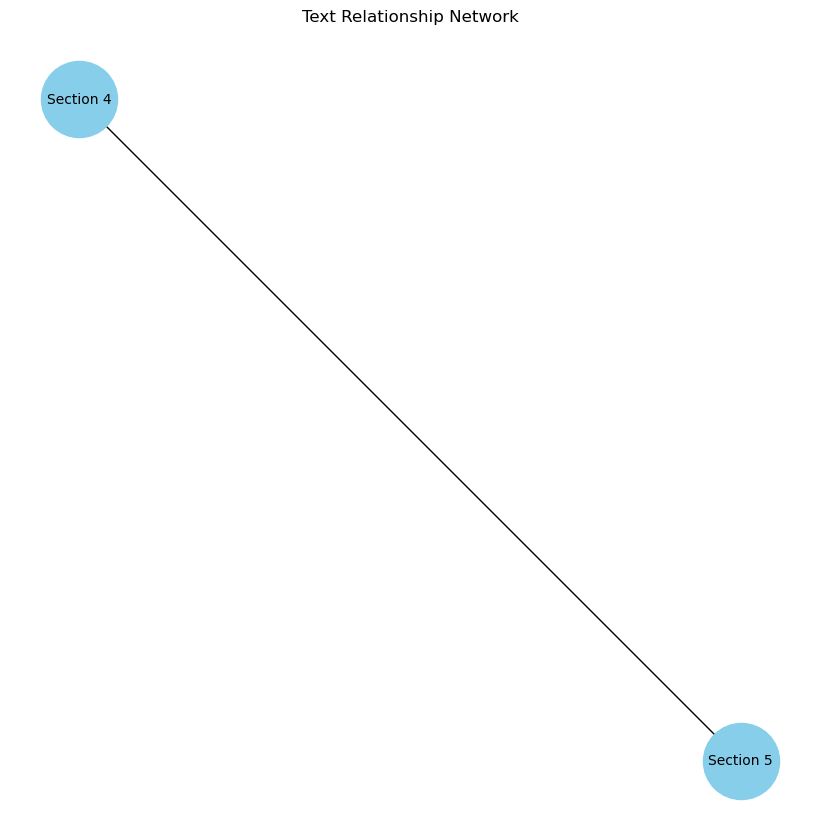

In [50]:
# ネットワークの描画
G = build_text_network(section_texts)
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10)
plt.title("Text Relationship Network")
plt.show()

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

# セクション別の最頻単語を抽出
def extract_most_frequent_words(section_texts):
    vectorizer = CountVectorizer(stop_words='english')
    results = {}
    for section_name, text in zip(section_names, section_texts):
        word_counts = vectorizer.fit_transform([text])
        word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.toarray()[0]))
        most_frequent_word = max(word_freq, key=word_freq.get)
        results[section_name] = (most_frequent_word, word_freq[most_frequent_word])
    return results

most_frequent_words = extract_most_frequent_words(section_texts)

# 結果を表示
for section, (word, count) in most_frequent_words.items():
    print(f"Section: {section}, Most Frequent Word: '{word}' (Count: {count})")


Section: Trust from the people, Most Frequent Word: 'politics' (Count: 3)
Section: Diplomacy and security, Most Frequent Word: 'japan' (Count: 18)
Section: Fertility reduction measures, Most Frequent Word: 'people' (Count: 5)
Section: Economic and fiscal, Most Frequent Word: 'economy' (Count: 11)
Section: Wage increases to keep up with prices, Most Frequent Word: 'high' (Count: 8)
Section: Energy, Most Frequent Word: 'energy' (Count: 7)
Section: Innovation and start-up support, Most Frequent Word: 'development' (Count: 3)
Section: Realisation of an ‘investment powerhouse’, Most Frequent Word: 'investment' (Count: 3)
Section: Social security, Most Frequent Word: 'security' (Count: 5)
Section: Ensuring good public security, Most Frequent Word: 'children' (Count: 1)
Section: Disaster prevention and recovery from the Great East Japan Earthquake, Most Frequent Word: 'disaster' (Count: 13)
Section: Regional development, Most Frequent Word: 'development' (Count: 17)
Section: Education reform,

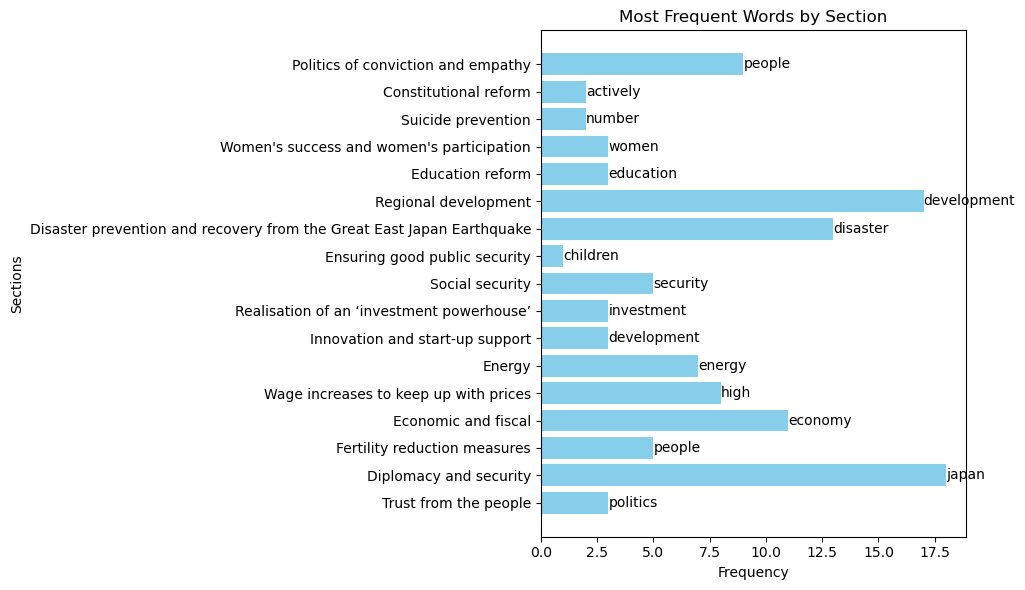

In [52]:
import matplotlib.pyplot as plt

# 最頻単語の頻度を棒グラフで可視化
def plot_most_frequent_words(most_frequent_words):
    sections = list(most_frequent_words.keys())
    words = [data[0] for data in most_frequent_words.values()]
    counts = [data[1] for data in most_frequent_words.values()]
    
    plt.figure(figsize=(10, 6))
    plt.barh(sections, counts, color='skyblue')
    for i, word in enumerate(words):
        plt.text(counts[i], i, f"{word}", va='center', ha='left')
    plt.xlabel('Frequency')
    plt.ylabel('Sections')
    plt.title('Most Frequent Words by Section')
    plt.tight_layout()
    plt.show()

plot_most_frequent_words(most_frequent_words)


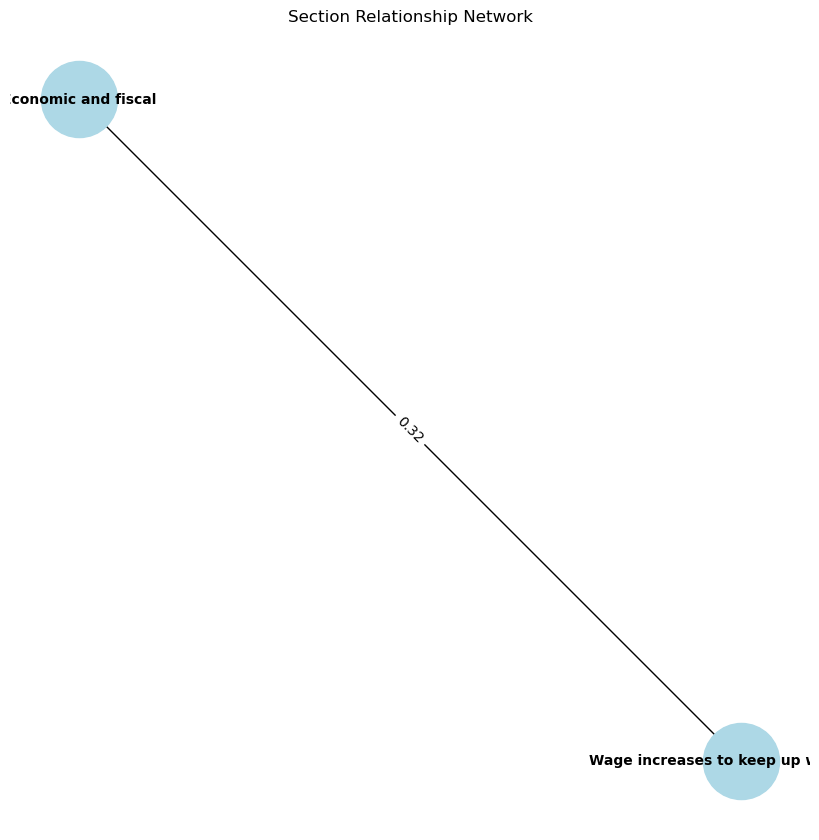

In [53]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ネットワーク構築
def build_text_network(sections, texts, threshold=0.3):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(texts)
    similarity_matrix = cosine_similarity(tfidf_matrix)
    
    G = nx.Graph()
    for i in range(len(sections)):
        for j in range(i + 1, len(sections)):
            if similarity_matrix[i, j] > threshold:
                G.add_edge(sections[i], sections[j], weight=similarity_matrix[i, j])
    return G

# ネットワークの描画
def plot_text_network(G):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    weights = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in weights.items()})
    plt.title("Section Relationship Network")
    plt.show()

# ネットワーク構築と可視化
G = build_text_network(section_names, section_texts)
plot_text_network(G)


In [54]:
# うまくいかん。https://chatgpt.com/share/675fb4e2-2c18-8000-83b1-f162546fdcc4